#### Initializing sub-parameters

Some parameters are dependant on others. islands is conditional to gene_flow_rate while num_competitors and boltzmann_temperature only apply to the tournament and boltzmann selection methods, respectively. So, we find the optimal values for these parameters first.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from tqdm import tqdm

from GA_params_class.GeneticAlgorithm import GeneticAlgorithm
from function_module import *

In [2]:
cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expressions = [0, 0.5, 1]
precision = None
verbose = 0
lieages = 10

In [3]:
# For each combination of islands and gene flow rate, run the GA and record the results

range_islands=np.linspace(1, 10, 10, dtype=int)
range_gene_flow_rate=np.linspace(0.1, 1, 10, dtype=float)

total_combinations = len(target_expressions) * len(range_islands) * len(range_gene_flow_rate)
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
gene_flow_rate_results = []

for target_expression in target_expressions:
    for islands in range_islands:
        for gene_flow_rate in range_gene_flow_rate:
            current_combination += 1
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                precision=precision,
                verbose=verbose,
                islands=islands, # Dependant variable
                gene_flow_rate=gene_flow_rate, # Dependant variable
            )
            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run(lieages)
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                gene_flow_rate_results.append({
                    'target_expression': target_expression,
                    'islands': islands,
                    'gene_flow_rate': gene_flow_rate,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lieages
                })
            
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            eta = ((elapsed_time / current_combination) * (total_combinations - current_combination))
            if eta > 60:
                eta_message = f"{eta/60:.2f}min"
            else:
                eta_message = f"{eta:.2f}s"
            progress_bar.set_postfix({
                "Elapsed": f"{elapsed_time:.2f}s",
                "ETA": eta_message
            })

# Close progress bar
progress_bar.close()

gene_flow_rate_results_df = pd.DataFrame(gene_flow_rate_results)
gene_flow_rate_results_df.to_csv('Data/sub_params/gene_flow_rate_results.csv', index=False)

Processing combinations:   0%|          | 0/300 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Instructions for updating:
Use tf.identity with explicit device placement instead.


Processing combinations: 100%|██████████| 300/300 [7:26:29<00:00, 89.30s/it, Elapsed=26789.74s, ETA=0.00s]       


In [4]:
gene_flow_rate_results_df = pd.read_csv('Data/sub_params/gene_flow_rate_results.csv')
gene_flow_rate_results_df.head()

,target_expression,islands,gene_flow_rate,error,run_time
0,0.0,1,0.1,0.136538,1.792993
1,0.0,1,0.1,0.180111,1.792993
2,0.0,1,0.1,0.164498,1.792993
3,0.0,1,0.1,0.157332,1.792993
4,0.0,1,0.1,0.145598,1.792993


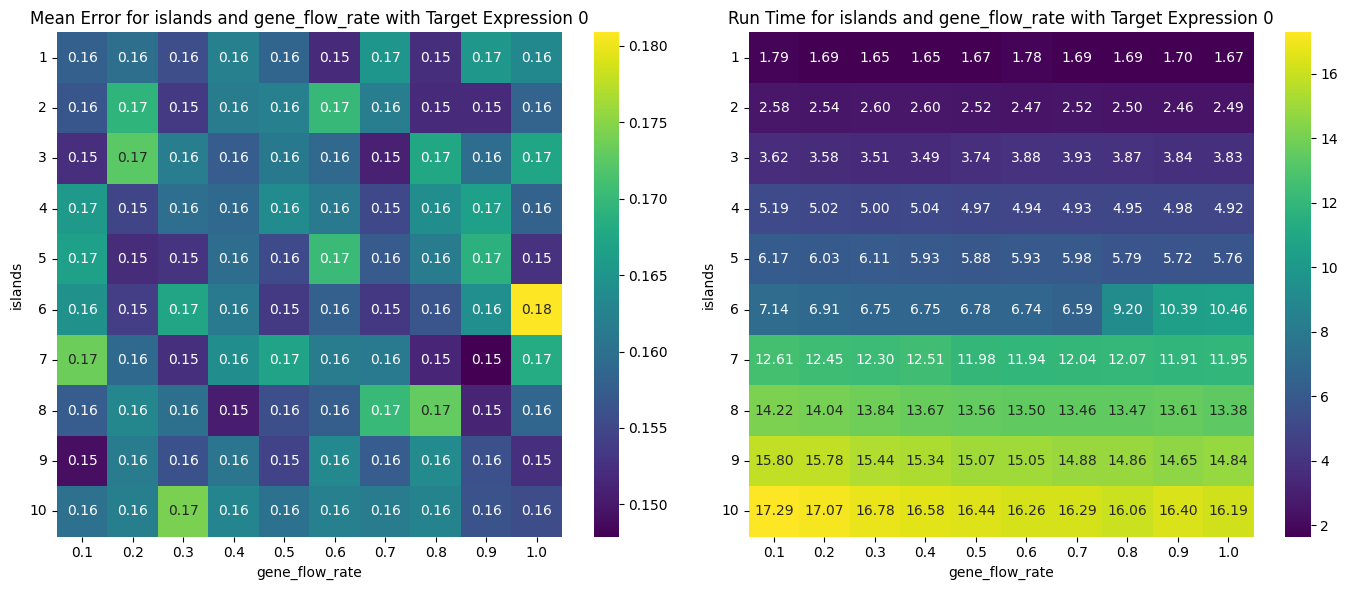

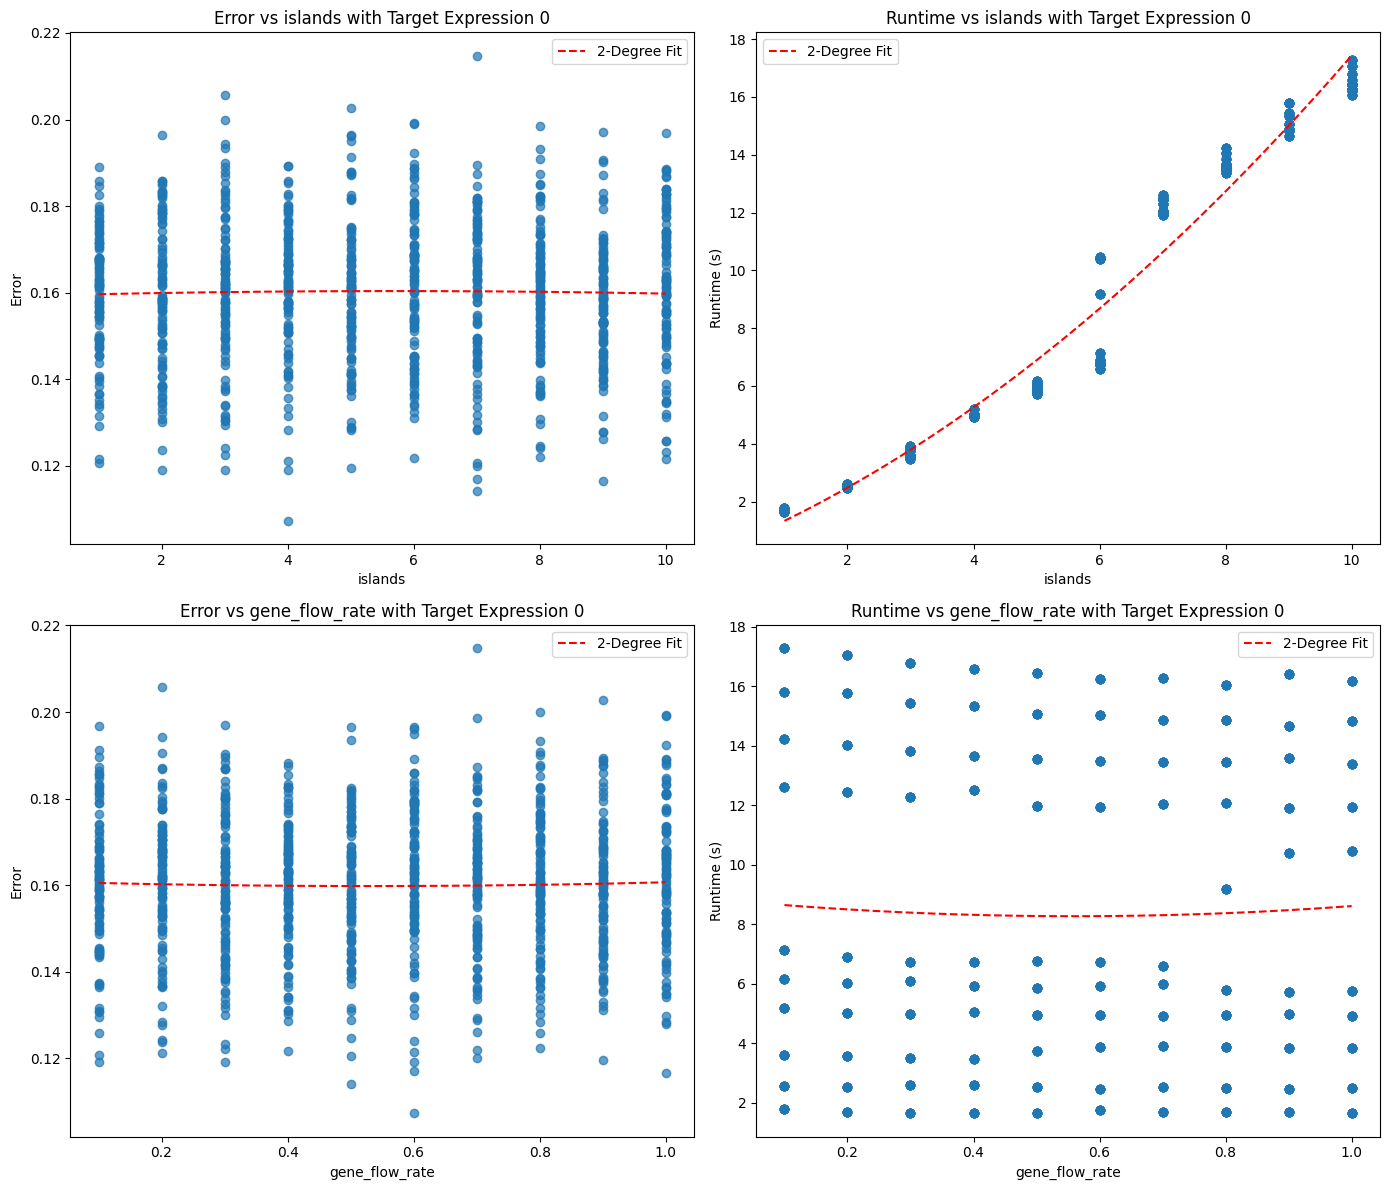

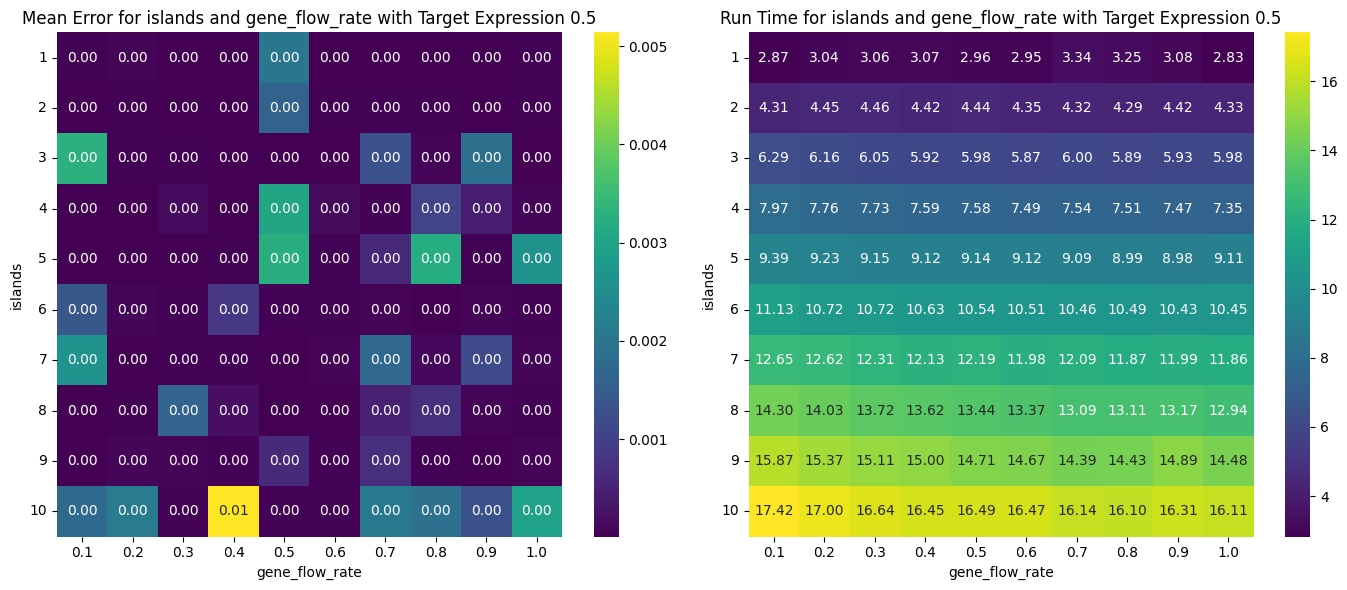

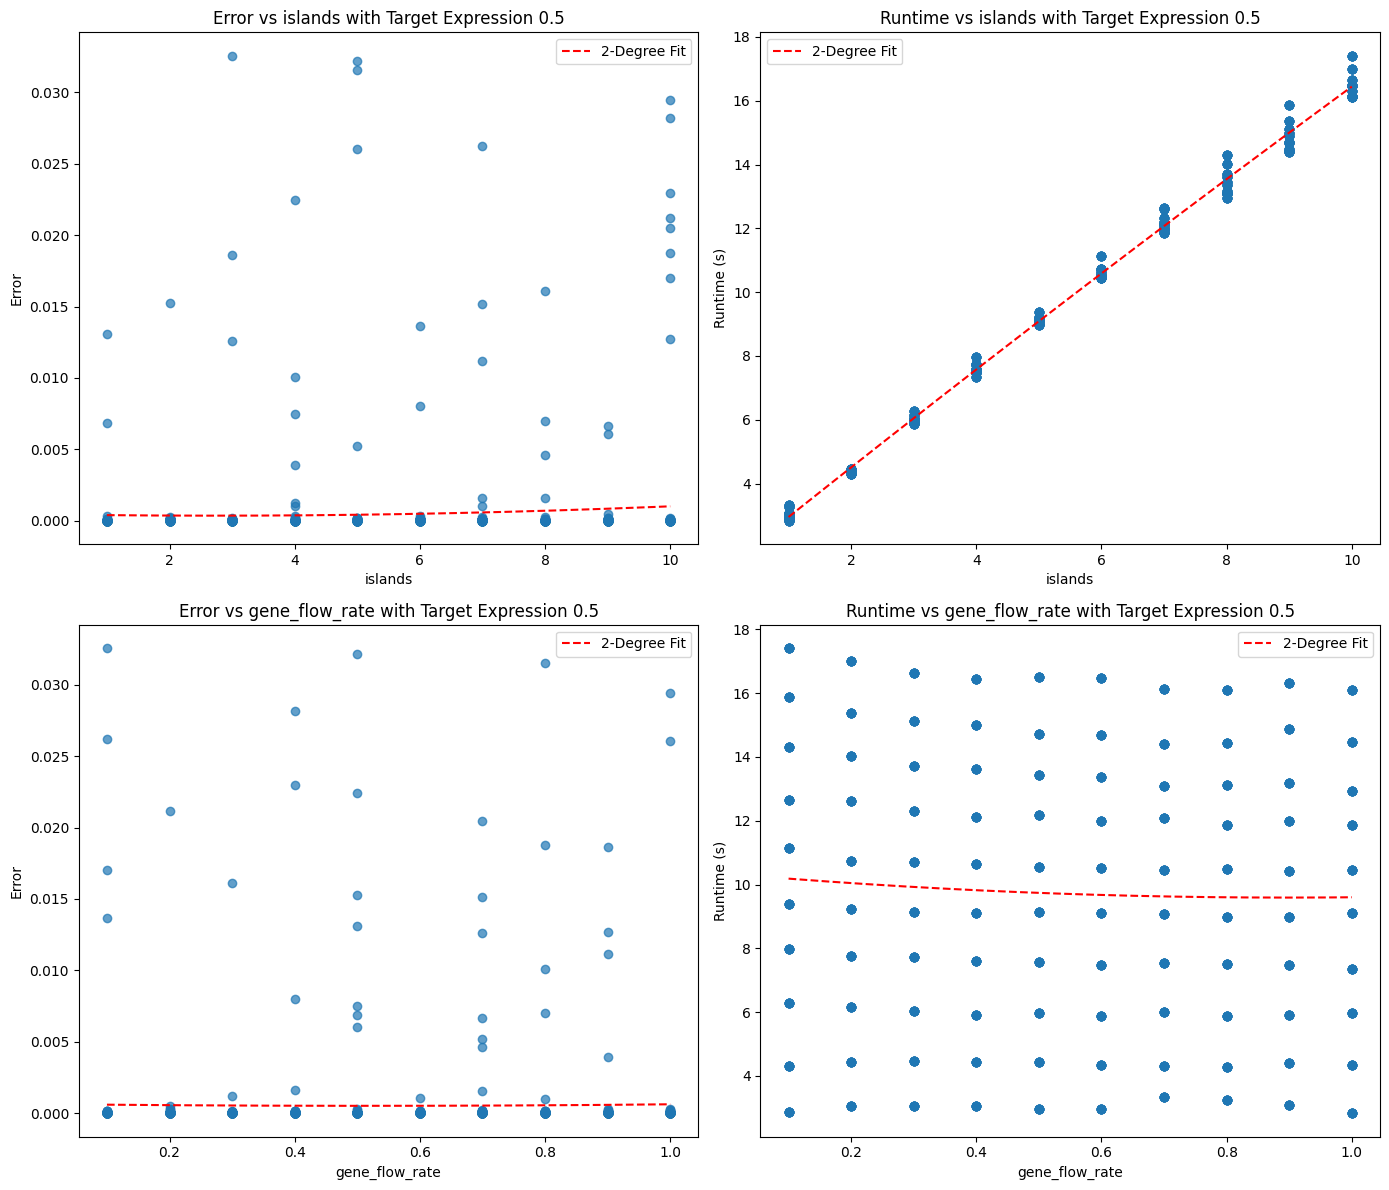

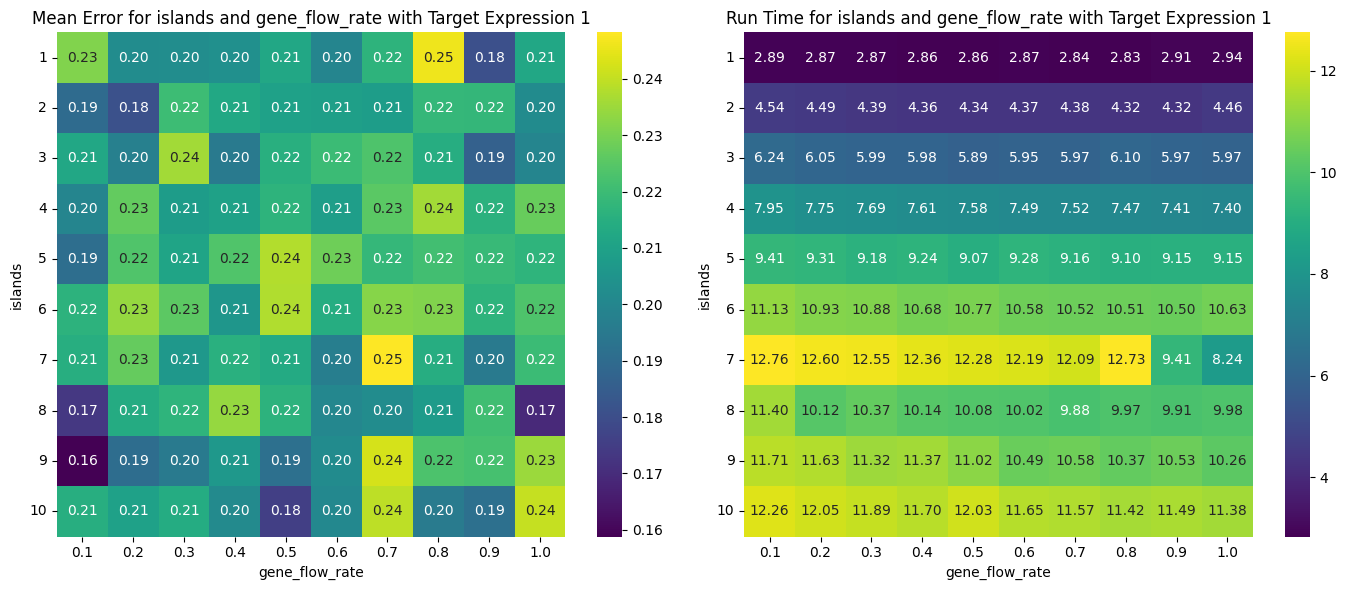

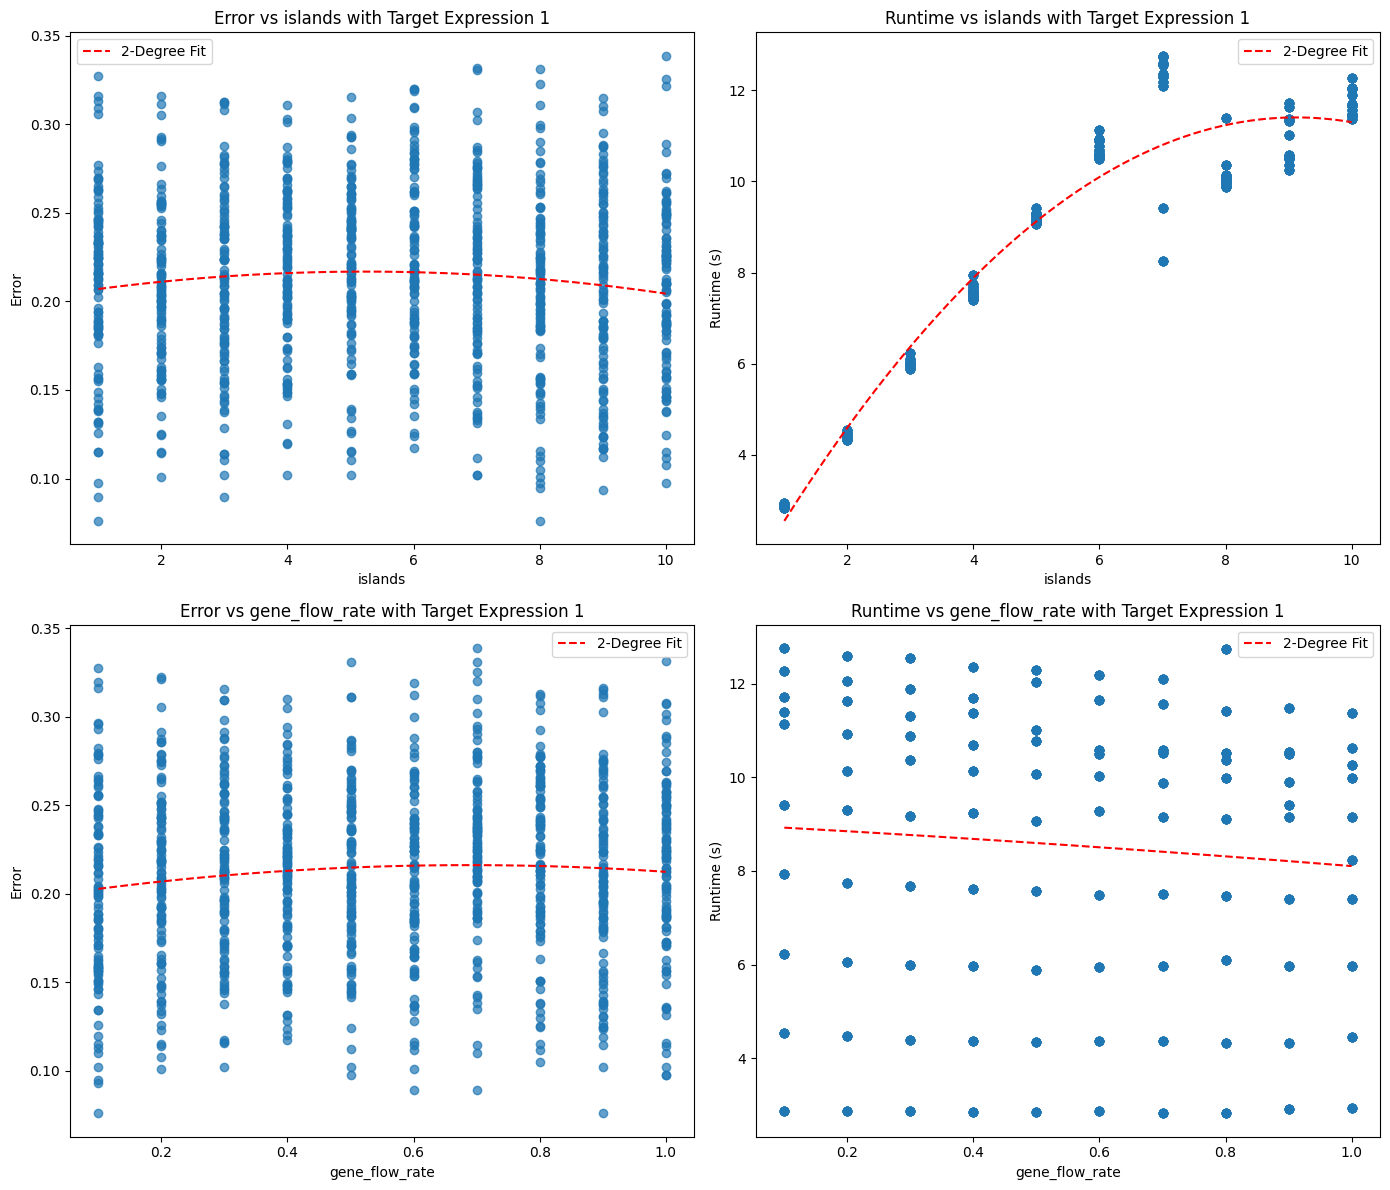

In [5]:
for target_expression in target_expressions:
    filtered_df = gene_flow_rate_results_df[gene_flow_rate_results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'islands', 'gene_flow_rate')
    scatter_plot(filtered_df, target_expression, 'islands', 'gene_flow_rate', polynomial_degree=2)

It appears that there is no relationship between islands and error or gene flow and error. However, 1 island is optimal for runtime.

## Boltzmann selection method sub-parameters

In [6]:
# Find optimal boltzmann_temperature

range_boltzmann_temperature=np.linspace(1, 10, 10, dtype=float)
boltzmann_results = []
total_combinations = len(target_expressions) * len(range_boltzmann_temperature)
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

for target_expression in target_expressions:
    for i, boltzmann_temperature in enumerate(range_boltzmann_temperature):
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            selection='boltzmann', # Dependant variable
            boltzmann_temperature=boltzmann_temperature, # Dependant variable
        )
        # Time the run
        start_time = time.time()
        best_sequences, best_predictions = ga.run(lieages)
        end_time = time.time() 

        # Record the results
        for sequence, prediction in zip(best_sequences, best_predictions):
            boltzmann_results.append({
                'target_expression': target_expression,
                'selection': 'boltzmann',
                'boltzmann_temperature': boltzmann_temperature,
                'error': abs(prediction - target_expression),
                'run_time': (end_time - start_time) / lieages
            })

        # Update progress bar
        progress_bar.update(1)
        elapsed_time = time.time() - initial_time
        eta = ((elapsed_time / (i+1)) * (total_combinations - (i+1)))
        if eta > 60:
            eta_message = f"{eta/60:.2f}min"
        else:
            eta_message = f"{eta:.2f}s"
        progress_bar.set_postfix({
            "Elapsed": f"{elapsed_time:.2f}s",
            "ETA": eta_message
        })

# Close progress bar
progress_bar.close()

boltzmann_results_df = pd.DataFrame(boltzmann_results)
boltzmann_results_df.to_csv('Data/sub_params/boltzmann_results_1.csv', index=False)

Processing combinations:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 30/30 [13:04<00:00, 26.14s/it, Elapsed=784.20s, ETA=26.14min] 


In [7]:
boltzmann_results_df = pd.read_csv('Data/sub_params/boltzmann_results_1.csv')
boltzmann_results_df.head()

,target_expression,selection,boltzmann_temperature,error,run_time
0,0.0,boltzmann,1.0,0.187535,2.63355
1,0.0,boltzmann,1.0,0.193109,2.63355
2,0.0,boltzmann,1.0,0.222186,2.63355
3,0.0,boltzmann,1.0,0.223677,2.63355
4,0.0,boltzmann,1.0,0.217049,2.63355


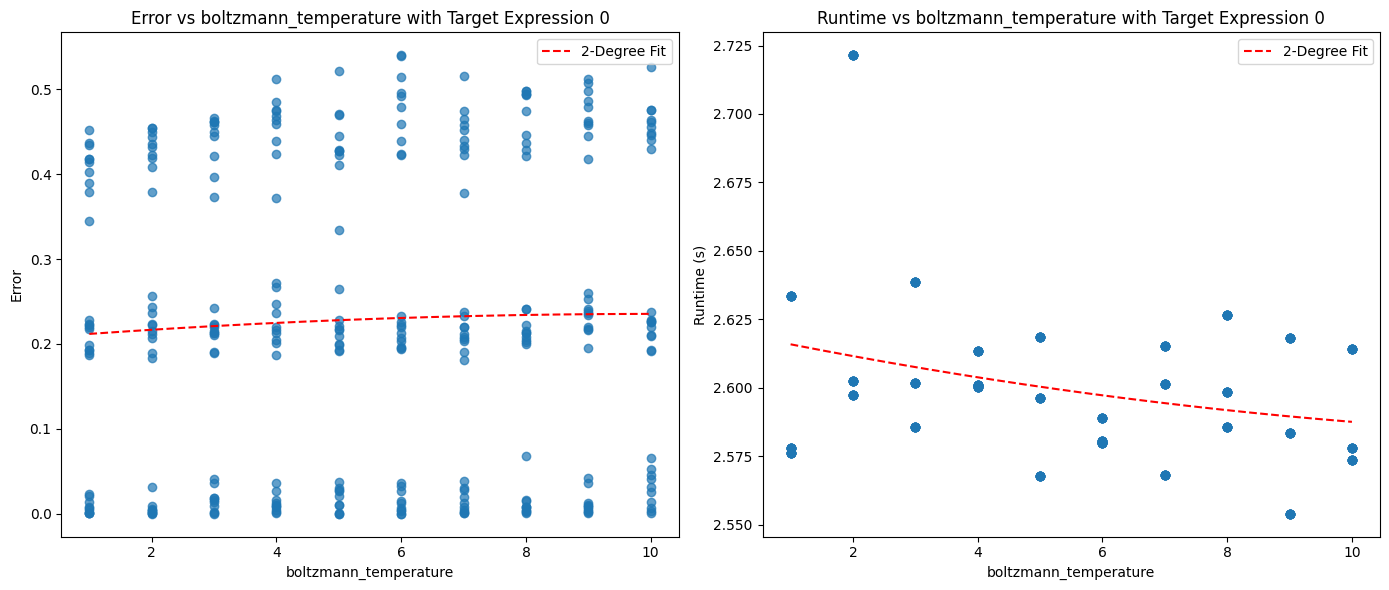

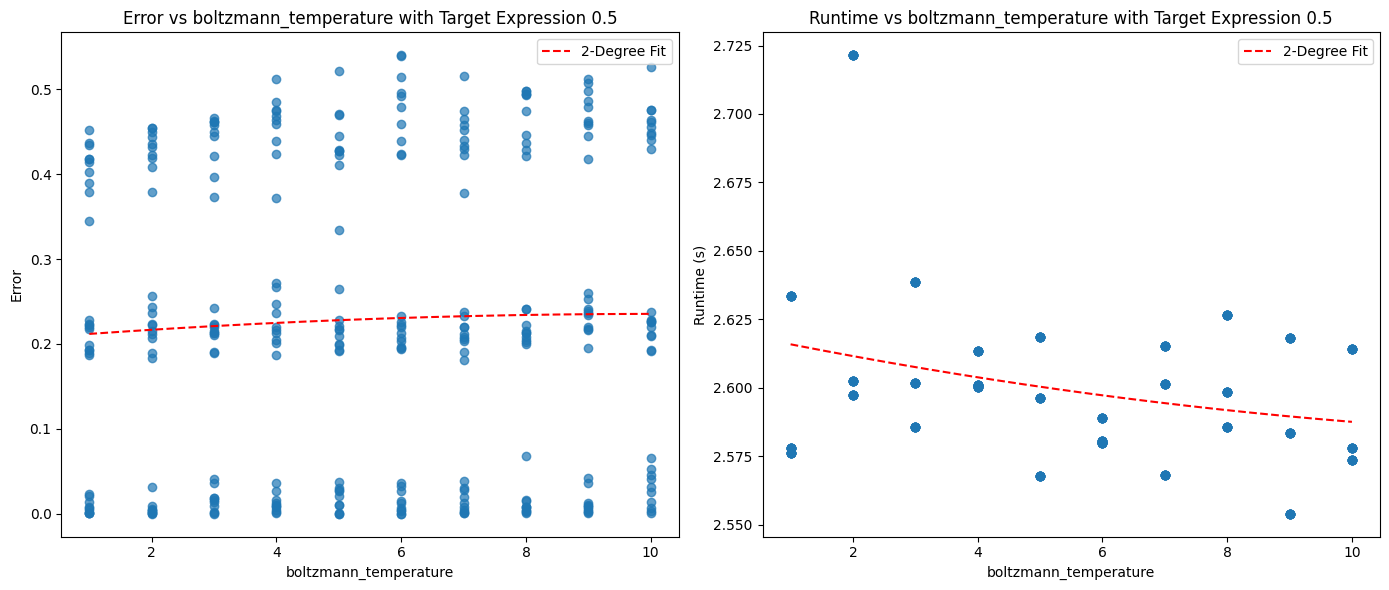

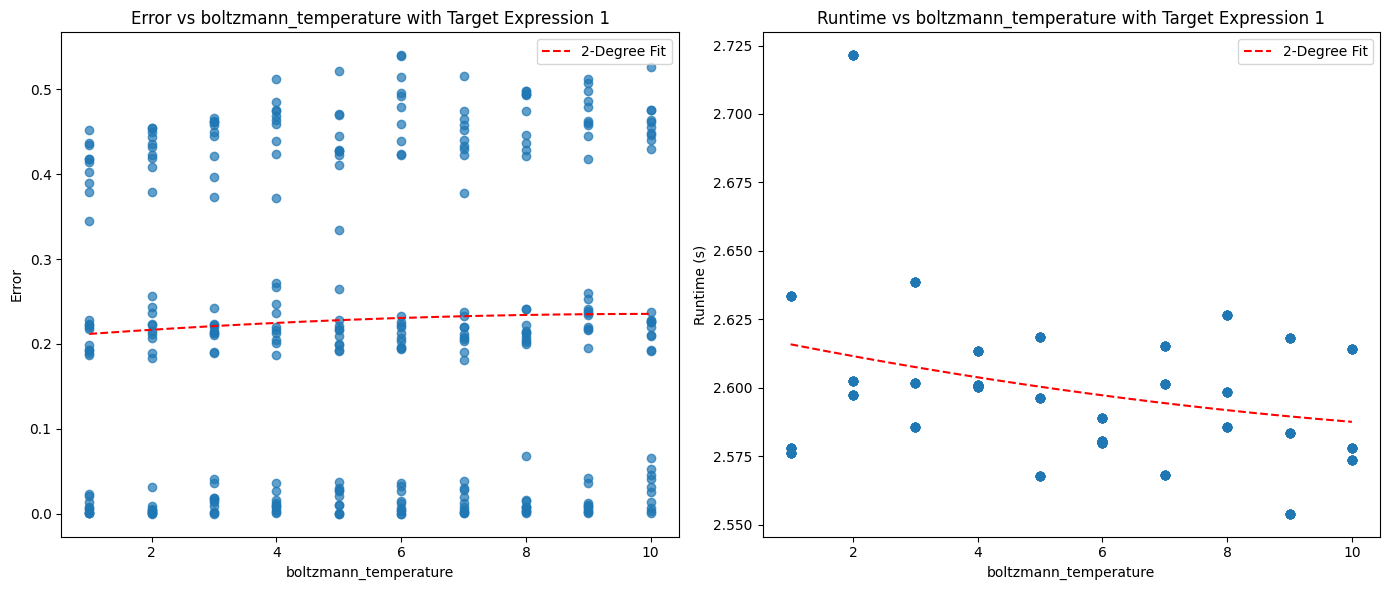

In [8]:
for target_expression in target_expressions:
    filtered_df = boltzmann_results_df[boltzmann_results_df['target_expression'] == target_expression]
    scatter_plot(boltzmann_results_df, target_expression, 'boltzmann_temperature', polynomial_degree=2)

The optimal boltzmann_temperature appears to be 1 or less than 1, so we rerun the tests to see how a boltzmann_temperature < 1 perform.

In [9]:
# Find optimal boltzmann_temperature

range_boltzmann_temperature=np.linspace(0.1, 1, 10, dtype=float)
boltzmann_results = []
total_combinations = len(target_expressions) * len(range_boltzmann_temperature)
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

for target_expression in target_expressions:
    for i, boltzmann_temperature in enumerate(range_boltzmann_temperature):
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            selection='boltzmann', # Dependant variable
            boltzmann_temperature=boltzmann_temperature, # Dependant variable
        )
        # Time the run
        start_time = time.time()
        best_sequences, best_predictions = ga.run(lieages)
        end_time = time.time()

        # Record the results
        for sequence, prediction in zip(best_sequences, best_predictions):
            boltzmann_results.append({
                'target_expression': target_expression,
                'selection': 'boltzmann',
                'boltzmann_temperature': boltzmann_temperature,
                'error': abs(prediction - target_expression),
                'run_time': (end_time - start_time) / lieages
            })

        # Update progress bar
        progress_bar.update(1)
        elapsed_time = time.time() - initial_time
        eta = ((elapsed_time / (i+1)) * (total_combinations - (i+1)))
        if eta > 60:
            eta_message = f"{eta/60:.2f}min"
        else:
            eta_message = f"{eta:.2f}s"
        progress_bar.set_postfix({
            "Elapsed": f"{elapsed_time:.2f}s",
            "ETA": eta_message
        })

# Close progress bar
progress_bar.close()

boltzmann_results_df = pd.DataFrame(boltzmann_results)
boltzmann_results_df.to_csv('Data/sub_params/boltzmann_results_2.csv', index=False)

Processing combinations:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 30/30 [13:01<00:00, 26.04s/it, Elapsed=781.08s, ETA=26.04min] 


In [10]:
boltzmann_results_df = pd.read_csv('Data/sub_params/boltzmann_results_2.csv')
boltzmann_results_df.head()

,target_expression,selection,boltzmann_temperature,error,run_time
0,0.0,boltzmann,0.1,0.159824,2.607554
1,0.0,boltzmann,0.1,0.162513,2.607554
2,0.0,boltzmann,0.1,0.191186,2.607554
3,0.0,boltzmann,0.1,0.175350,2.607554
4,0.0,boltzmann,0.1,0.165693,2.607554


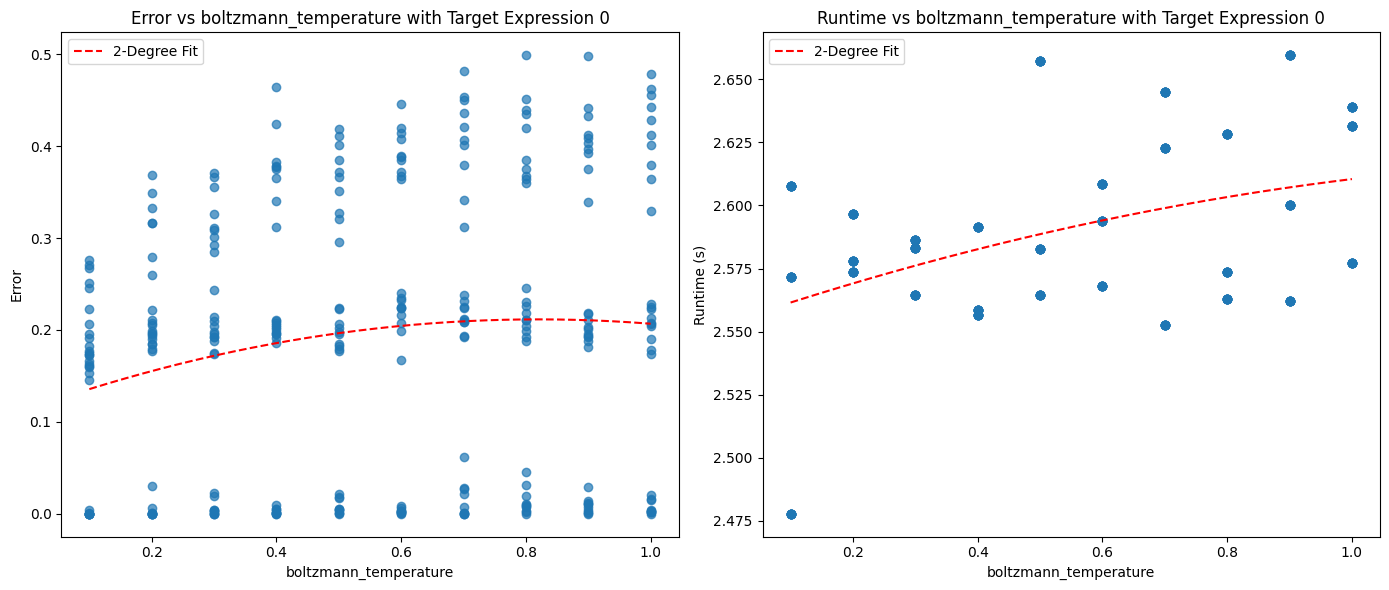

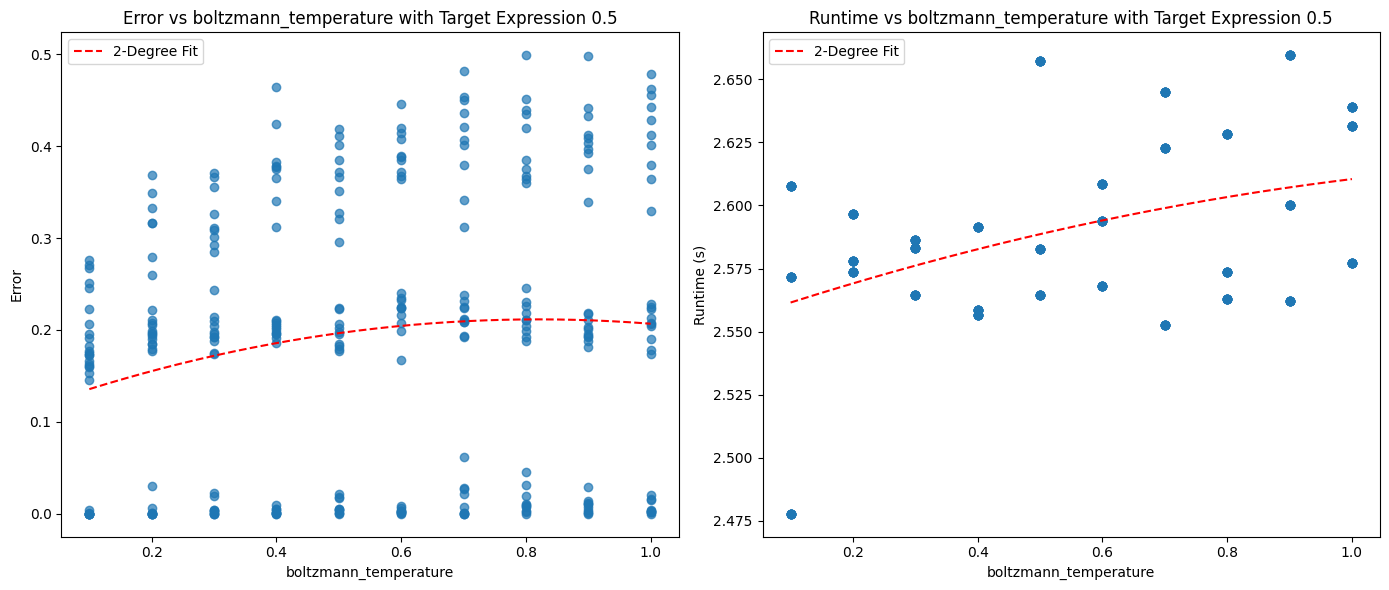

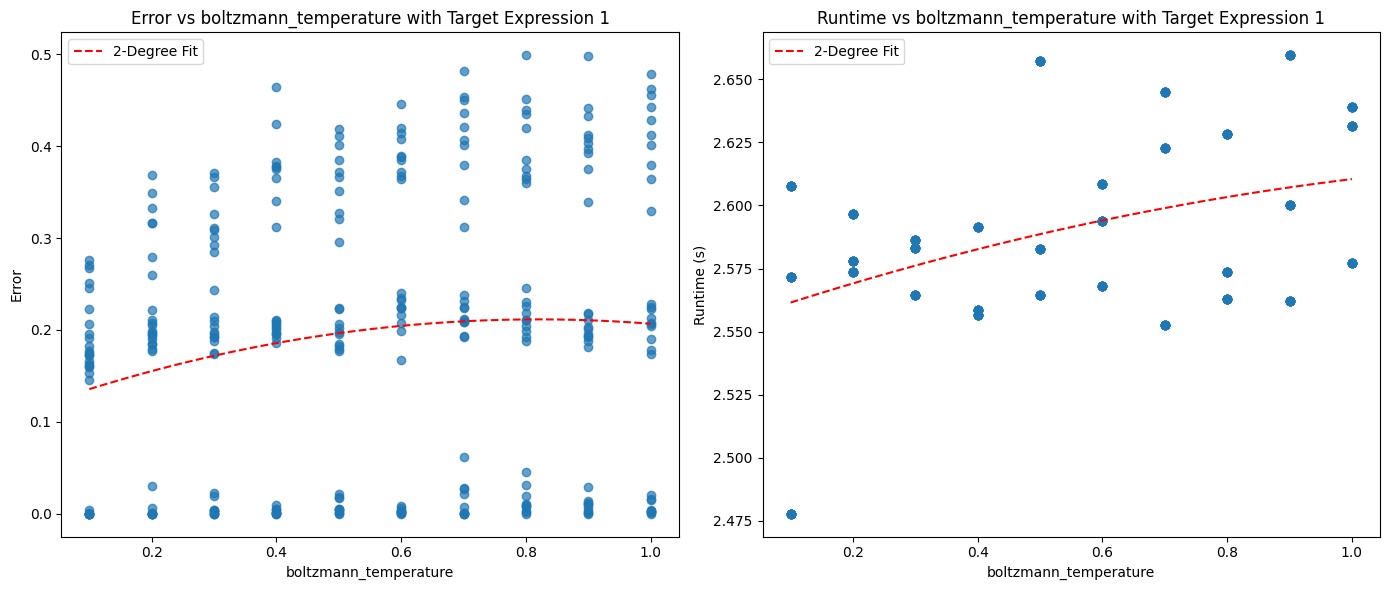

In [11]:
for target_expression in target_expressions:
    filtered_df = boltzmann_results_df[boltzmann_results_df['target_expression'] == target_expression]
    scatter_plot(boltzmann_results_df, target_expression, 'boltzmann_temperature', polynomial_degree=2)

We can see that the optimal boltzmann_temperature is 0. When boltzmann_temperature is 0, the boltzmann selection method is equivalent to truncation selection: always selecting the fittest individuals without considering diversity.

## Tournament selection method sub-parameters

In [12]:
# Find optimal num_competitors

range_num_competitors=np.linspace(1, 50, 20, dtype=int)
tournament_results = []
total_combinations = len(target_expressions) * len(range_num_competitors)
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

for target_expression in target_expressions:
    for i, num_competitors in enumerate(range_num_competitors):
        ga = GeneticAlgorithm(
            cnn_model_path=cnn_model_path,
            masked_sequence=masked_sequence,
            target_expression=target_expression,
            precision=precision,
            verbose=verbose,
            selection='tournament', # Dependant variable
            num_competitors=num_competitors, # Dependant variable
        )
        # Time the run
        start_time = time.time()
        best_sequences, best_predictions = ga.run(lieages)
        end_time = time.time()

        # Record the results
        for sequence, prediction in zip(best_sequences, best_predictions):
            tournament_results.append({
                'target_expression': target_expression,
                'selection': 'tournament',
                'num_competitors': num_competitors,
                'error': abs(prediction - target_expression),
                'run_time': (end_time - start_time) / lieages
            })

        # Update progress bar
        progress_bar.update(1)
        elapsed_time = time.time() - initial_time
        eta = ((elapsed_time / (i+1)) * (total_combinations - (i+1)))
        if eta > 60:
            eta_message = f"{eta/60:.2f}min"
        else:
            eta_message = f"{eta:.2f}s"
        progress_bar.set_postfix({
            "Elapsed": f"{elapsed_time:.2f}s",
            "ETA": eta_message
        })

# Close progress bar
progress_bar.close()

tournament_results_df = pd.DataFrame(tournament_results)
tournament_results_df.to_csv('Data/sub_params/tournament_results_1.csv', index=False)

Processing combinations:   0%|          | 0/60 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 60/60 [18:38<00:00, 18.65s/it, Elapsed=1118.72s, ETA=37.29min]


In [13]:
tournament_results_df = pd.read_csv('Data/sub_params/tournament_results_1.csv')
tournament_results_df.head()

,target_expression,selection,num_competitors,error,run_time
0,0.0,tournament,1,0.196734,2.573078
1,0.0,tournament,1,0.253650,2.573078
2,0.0,tournament,1,0.222468,2.573078
3,0.0,tournament,1,0.206949,2.573078
4,0.0,tournament,1,0.198758,2.573078


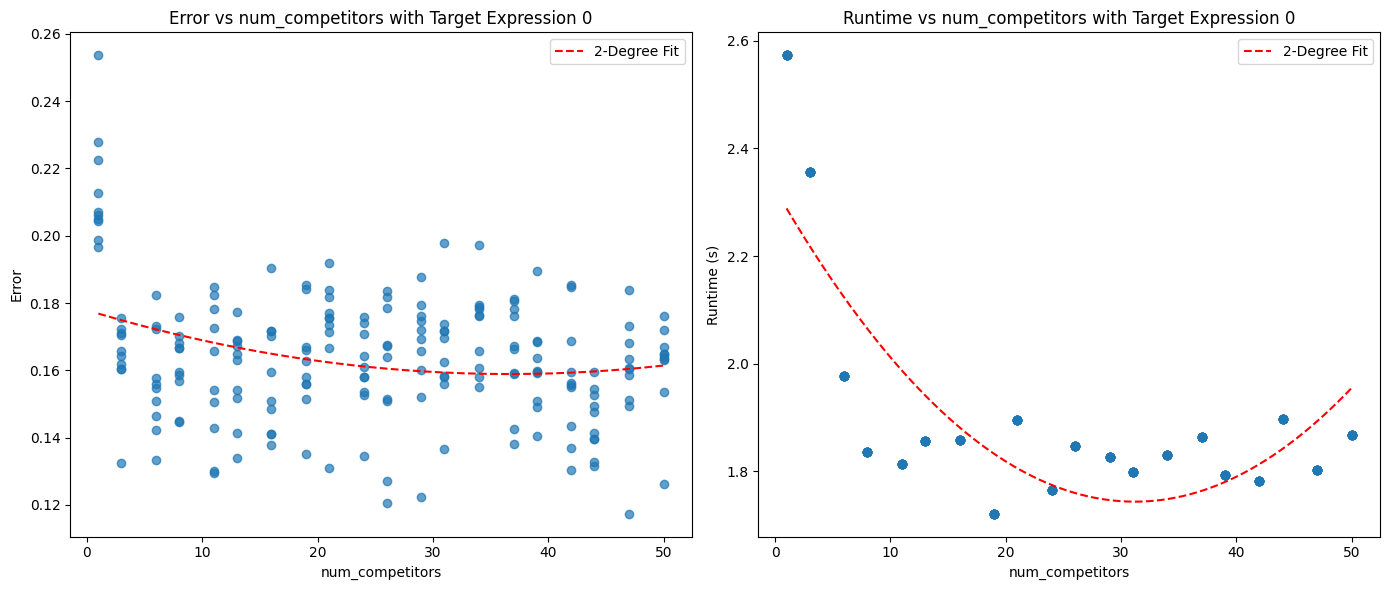

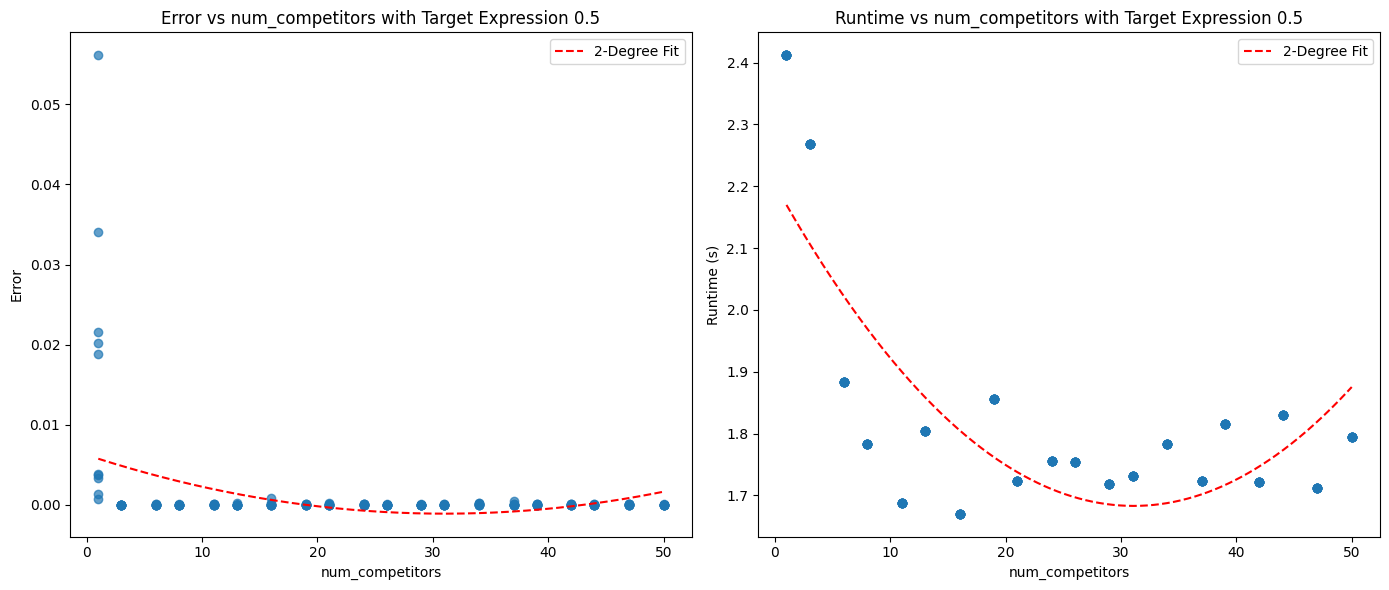

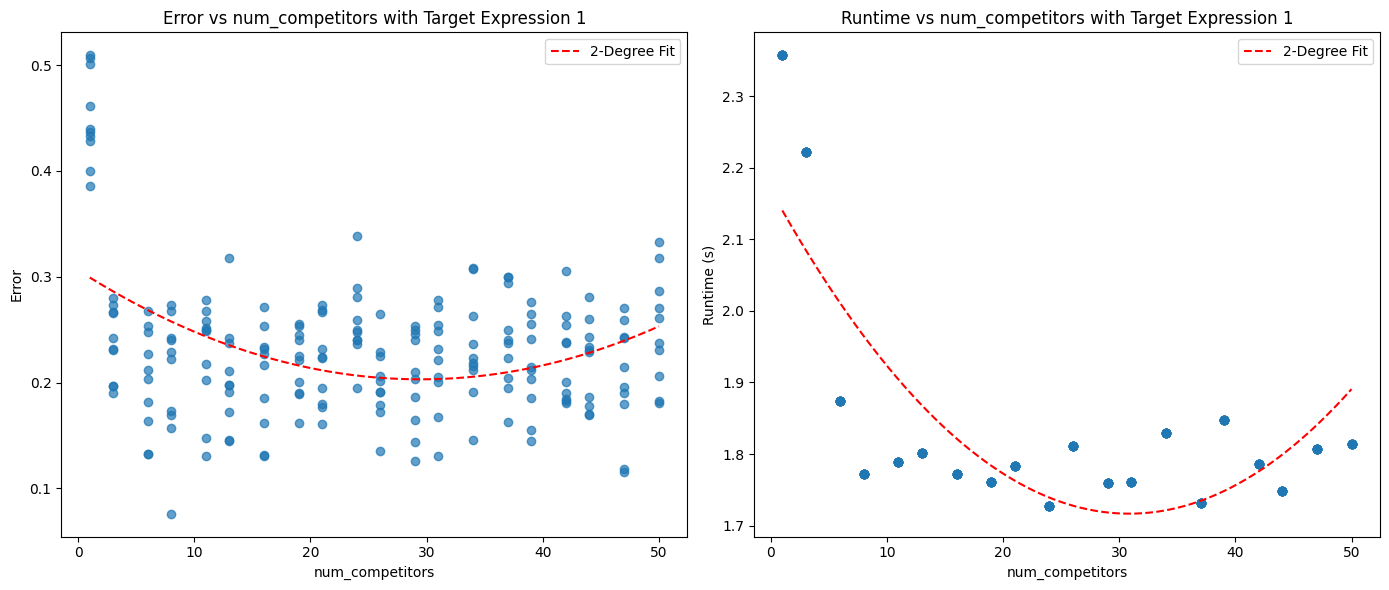

In [14]:
for target_expression in target_expressions:
    filtered_df = tournament_results_df[tournament_results_df['target_expression'] == target_expression]
    scatter_plot(filtered_df, target_expression, 'num_competitors', polynomial_degree=2)

The error stays around the same for num_competitors (after num_competitors=1), but the minimum runtime appears to be around 25. This may be dependant on pop_size, so we will do an interdependant comparison before "zooming in."

In [15]:
# For each combination of population sizes and number of competitors, run the GA and record the results

range_pop_size=np.linspace(50, 400, 8, dtype=int)
range_num_competitors=np.linspace(1, 50, 20, dtype=int)

total_combinations = len(target_expressions) * len(range_pop_size) * len(range_num_competitors)
progress_bar = tqdm(total=total_combinations, desc="Processing combinations", position=0)
initial_time = time.time()

current_combination = 0
pop_size_competitors_results = []

for target_expression in target_expressions:
    for pop_size in range_pop_size:
        for num_competitors in range_num_competitors:
            current_combination += 1
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                precision=precision,
                verbose=verbose,
                selection='tournament', # Dependant variable
                pop_size=pop_size, # Dependant variable
                num_competitors=num_competitors, # Dependant variable
            )
            # Time the run
            start_time = time.time()
            best_sequences, best_predictions = ga.run(lieages)
            end_time = time.time()

            # Record the results
            for sequence, prediction in zip(best_sequences, best_predictions):
                pop_size_competitors_results.append({
                    'target_expression': target_expression,
                    'pop_size': pop_size,
                    'num_competitors': num_competitors,
                    'error': abs(prediction - target_expression),
                    'run_time': (end_time - start_time) / lieages
                })
            
            # Update progress bar
            progress_bar.update(1)
            elapsed_time = time.time() - initial_time
            eta = ((elapsed_time / current_combination) * (total_combinations - current_combination))
            if eta > 60:
                eta_message = f"{eta/60:.2f}min"
            else:
                eta_message = f"{eta:.2f}s"
            progress_bar.set_postfix({
                "Elapsed": f"{elapsed_time:.2f}s",
                "ETA": eta_message
            })

# Close progress bar
progress_bar.close()

pop_size_competitors_results_df = pd.DataFrame(pop_size_competitors_results)
pop_size_competitors_results_df.to_csv('Data/sub_params/pop_size_competitors_results.csv', index=False)

Processing combinations:   0%|          | 0/480 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 480/480 [3:29:49<00:00, 26.23s/it, Elapsed=12589.49s, ETA=0.00s]     


In [16]:
pop_size_competitors_results_df = pd.read_csv('Data/sub_params/pop_size_competitors_results.csv')
pop_size_competitors_results_df.head()

,target_expression,pop_size,num_competitors,error,run_time
0,0.0,50,1,0.180678,1.748424
1,0.0,50,1,0.184635,1.748424
2,0.0,50,1,0.223451,1.748424
3,0.0,50,1,0.238815,1.748424
4,0.0,50,1,0.234880,1.748424


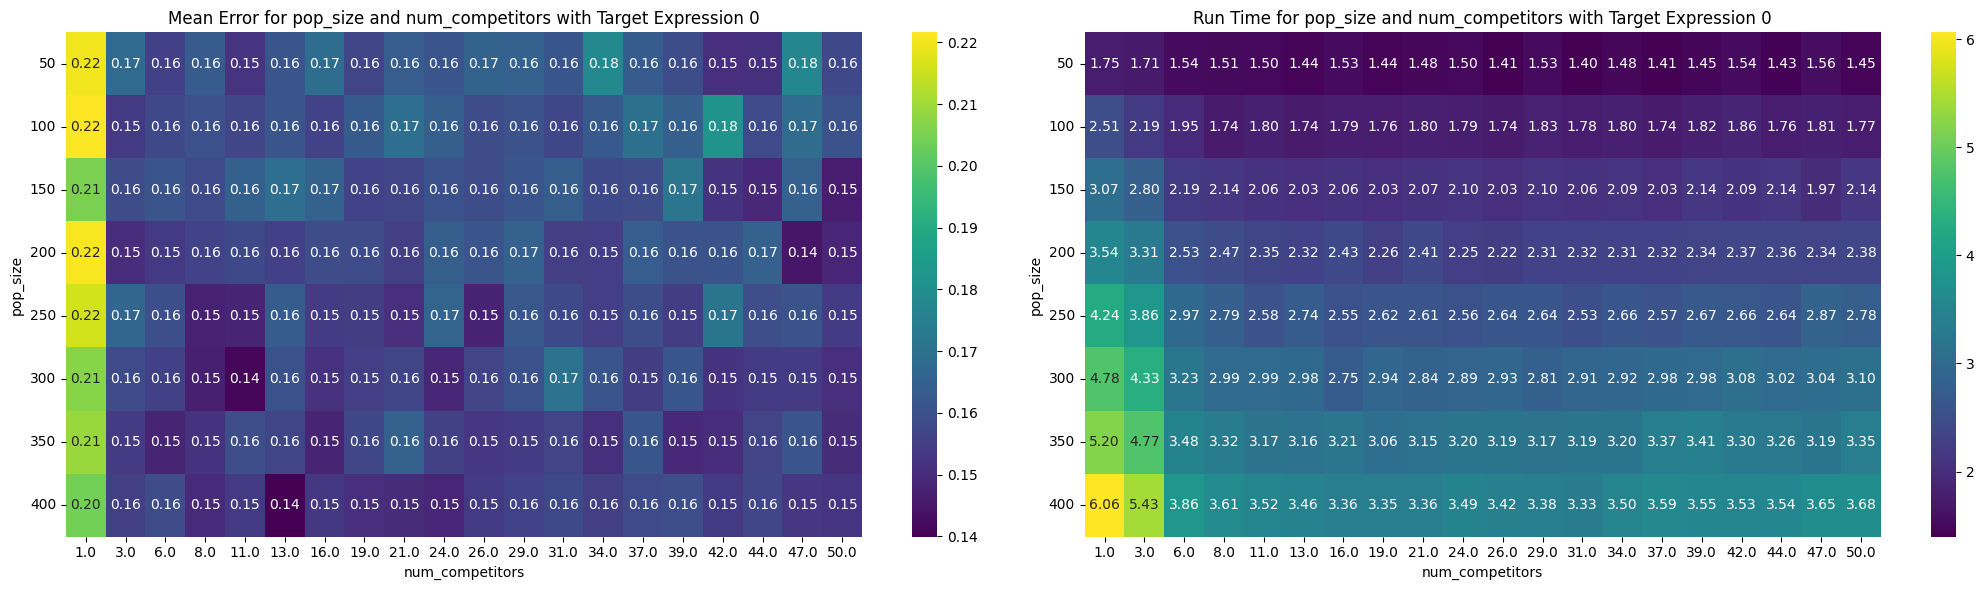

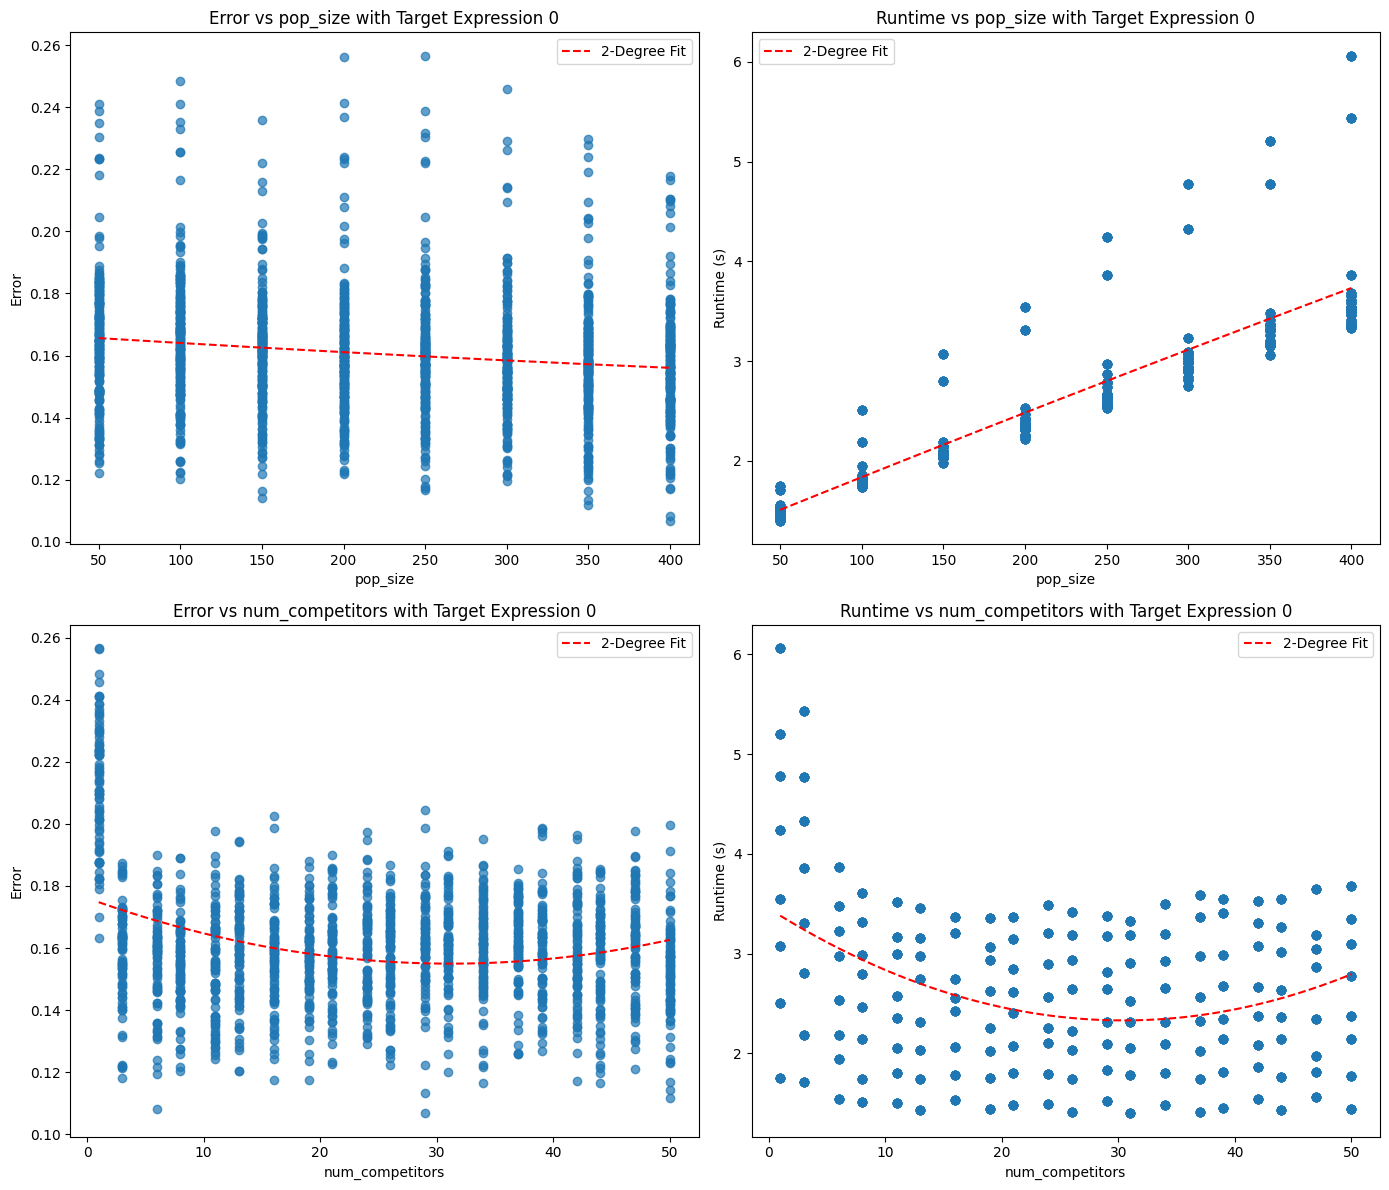

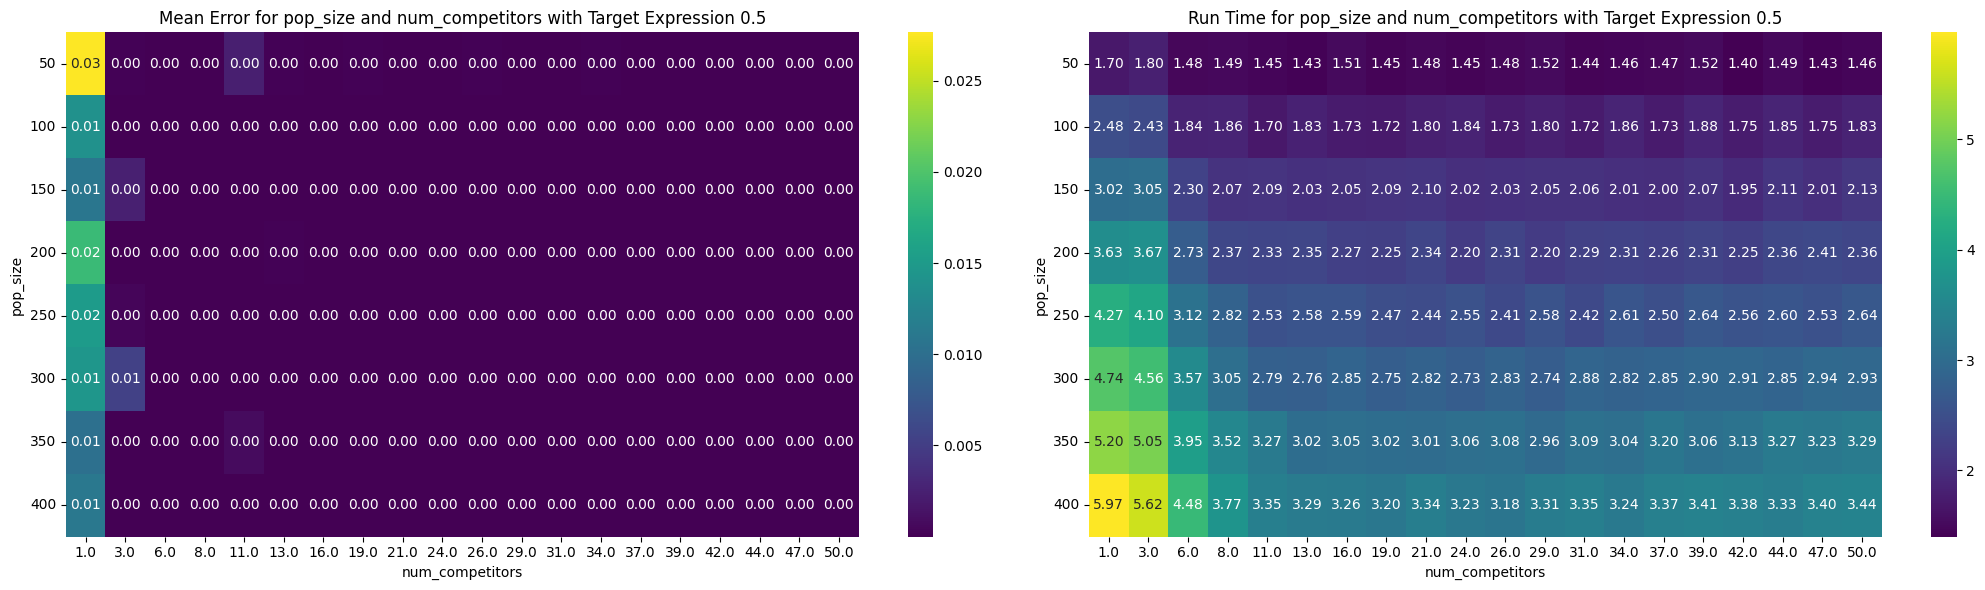

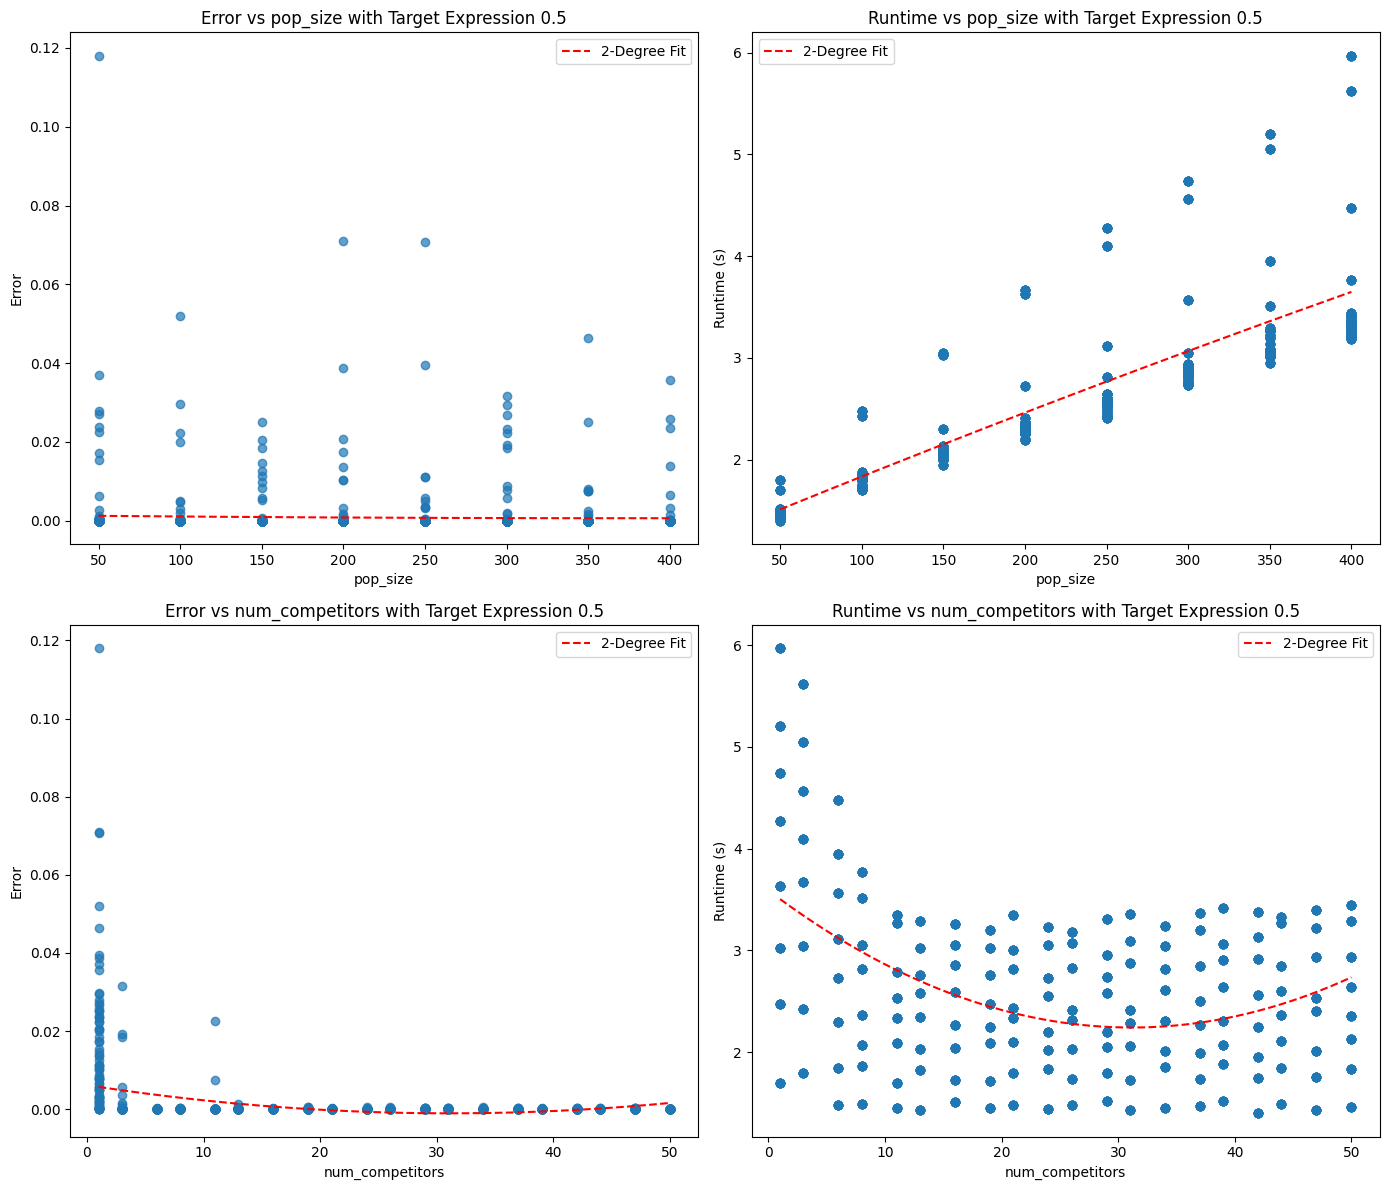

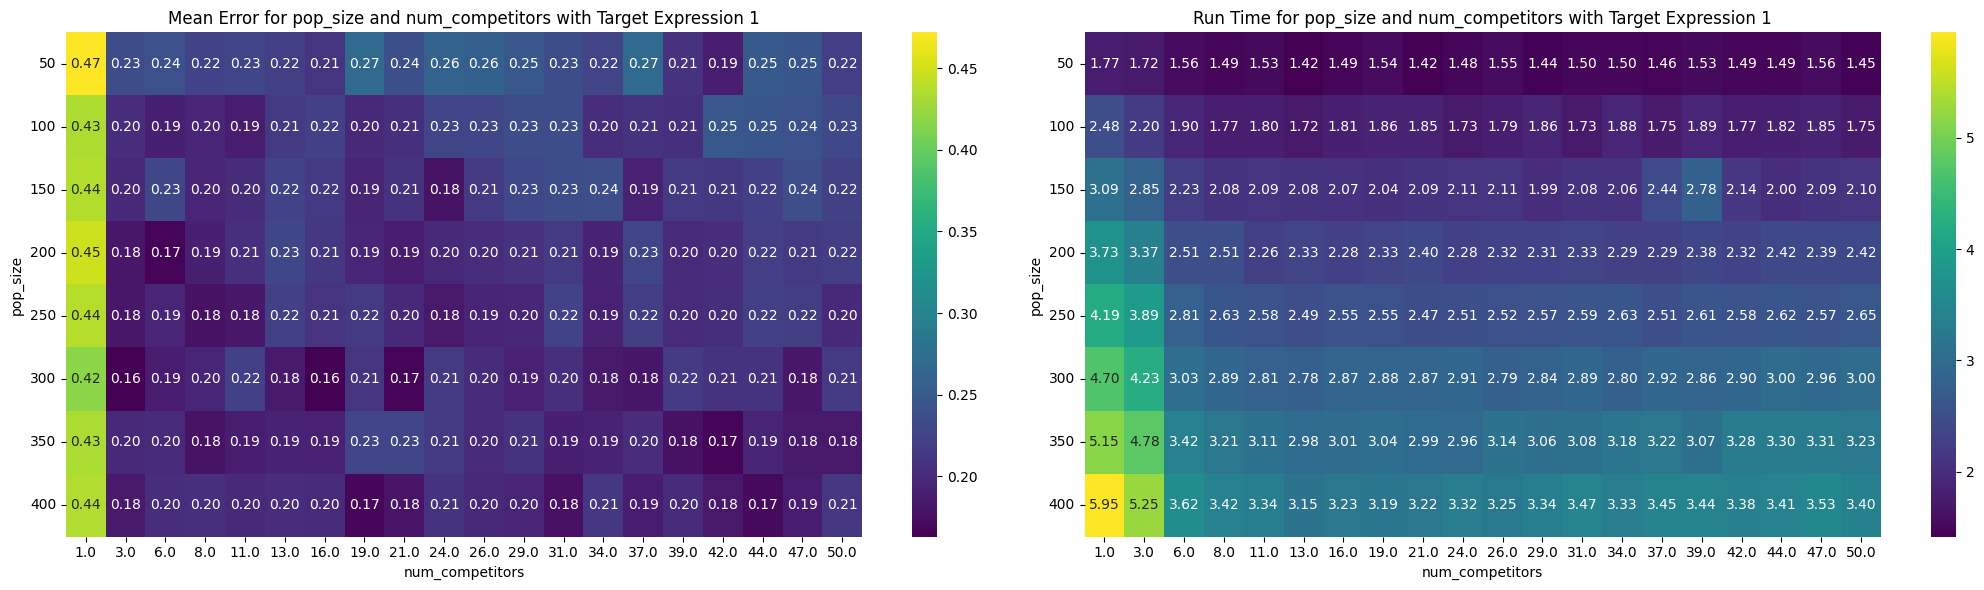

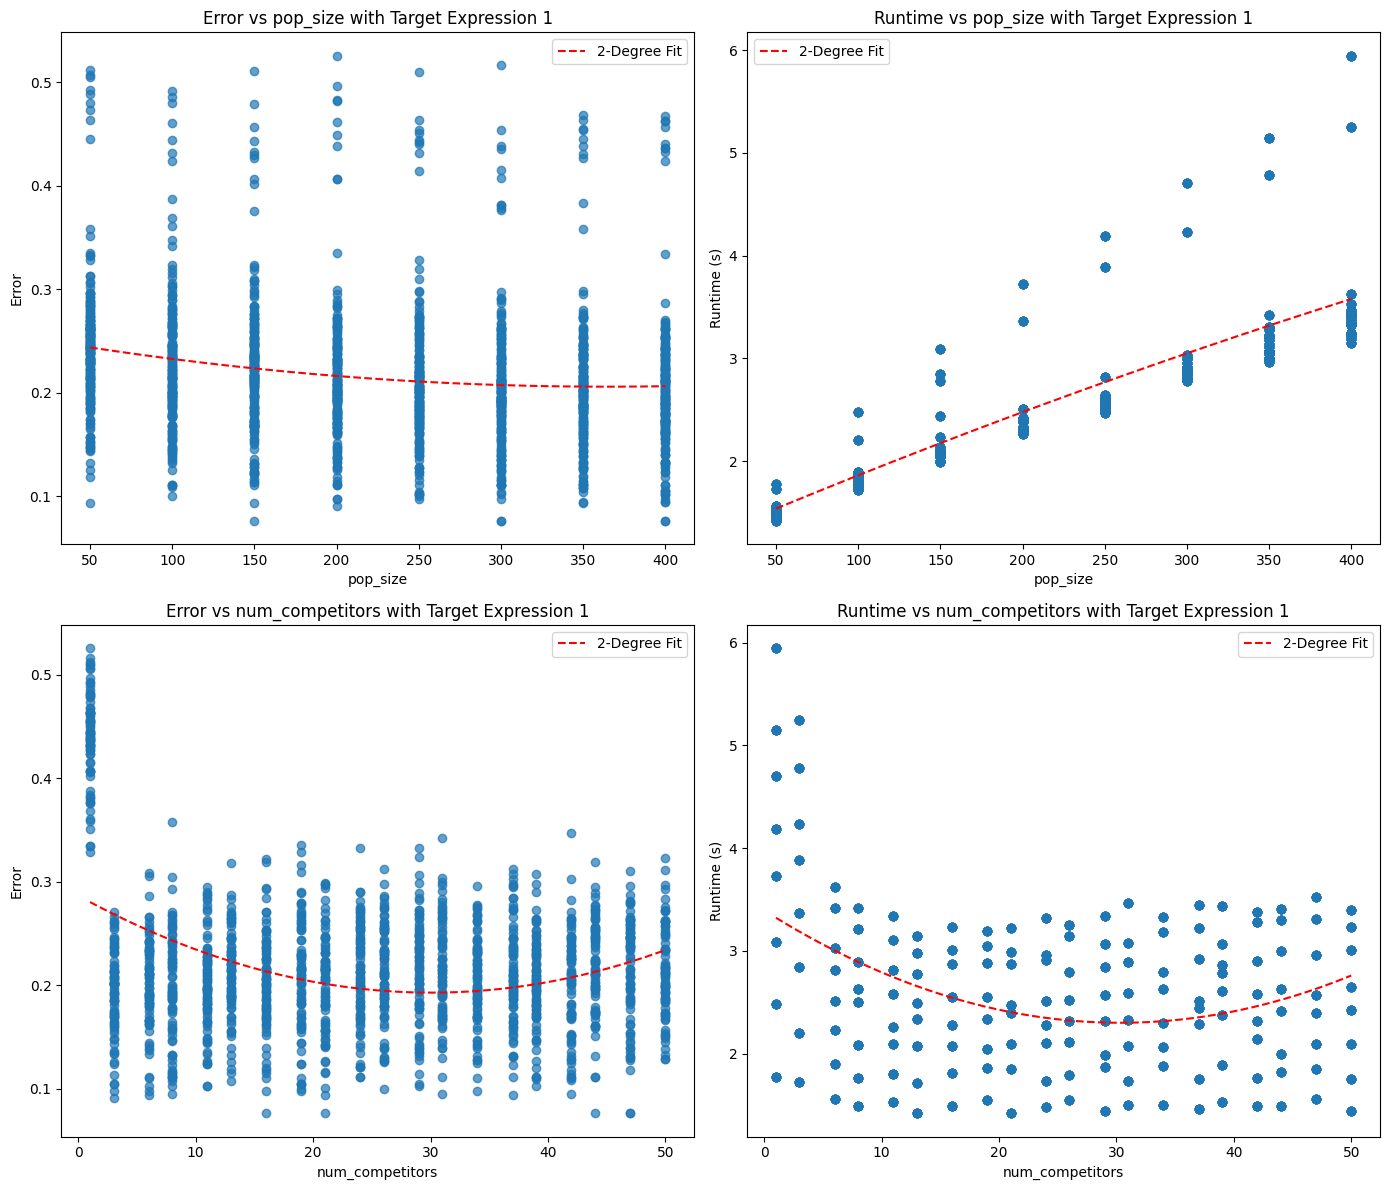

In [17]:
for target_expression in target_expressions:
    filtered_df = pop_size_competitors_results_df[pop_size_competitors_results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'pop_size', 'num_competitors', (21, 6))
    scatter_plot(filtered_df, target_expression, 'pop_size', 'num_competitors', polynomial_degree=2)